In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Reading the Dataset
df=pd.read_csv('cgwb-changes-in-depth-to-water-level.csv')

In [3]:
df

,id,date,state_name,state_code,district_name,district_code,station_name,latitude,longitude,basin,sub_basin,source,currentlevel,level_diff
0,0,2013-11-04,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,0.10,-1.03
1,1,2014-05-14,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,2.60,2.50
2,2,2014-11-04,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,0.35,-2.25
3,3,2015-05-14,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,2.52,2.17
4,4,2015-11-04,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,0.69,-1.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550845,550845,2019-03-16,Arunachal Pradesh,12,Lohit,234,Lathow,27.66667,95.87500,Brahamaputra,Brahmaputra Upper,CGWB,4.82,0.28
550846,550846,2019-08-13,Arunachal Pradesh,12,Lohit,234,Lathow,27.66667,95.87500,Brahamaputra,Brahmaputra Upper,CGWB,3.13,-1.69
550847,550847,2019-11-29,Arunachal Pradesh,12,Lohit,234,Lathow,27.66667,95.87500,Brahamaputra,Brahmaputra Upper,CGWB,4.20,1.07
550848,550848,2020-01-09,Arunachal Pradesh,12,Lohit,234,Lathow,27.66667,95.87500,Brahamaputra,Brahmaputra Upper,CGWB,4.10,-0.10


In [4]:
df.head()

,id,date,state_name,state_code,district_name,district_code,station_name,latitude,longitude,basin,sub_basin,source,currentlevel,level_diff
0,0,2013-11-04,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,0.10,-1.03
1,1,2014-05-14,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,2.60,2.50
2,2,2014-11-04,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,0.35,-2.25
3,3,2015-05-14,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,2.52,2.17
4,4,2015-11-04,Andaman And Nicobar Islands,35,North And Middle Andaman,632,Laxmipur,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,CGWB,0.69,-1.83


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550850 entries, 0 to 550849
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             550850 non-null  int64  
 1   date           550850 non-null  object 
 2   state_name     550850 non-null  object 
 3   state_code     550850 non-null  int64  
 4   district_name  550850 non-null  object 
 5   district_code  550850 non-null  int64  
 6   station_name   550850 non-null  object 
 7   latitude       550850 non-null  float64
 8   longitude      550850 non-null  float64
 9   basin          550850 non-null  object 
 10  sub_basin      550850 non-null  object 
 11  source         550850 non-null  object 
 12  currentlevel   550850 non-null  float64
 13  level_diff     550850 non-null  float64
dtypes: float64(4), int64(3), object(7)
memory usage: 58.8+ MB


In [6]:
df.isnull().sum()

id               0
date             0
state_name       0
state_code       0
district_name    0
district_code    0
station_name     0
latitude         0
longitude        0
basin            0
sub_basin        0
source           0
currentlevel     0
level_diff       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,id,state_code,district_code,latitude,longitude,currentlevel,level_diff
count,550850.000000,550850.000000,550850.000000,550850.000000,550850.000000,550850.000000,550850.000000
mean,275424.500000,22.550522,396.961078,20.156235,79.304912,8.515535,0.015445
std,159016.842228,9.200259,169.397554,6.202342,4.766219,10.717358,5.773125
min,0.000000,1.000000,1.000000,8.083330,68.675000,0.000000,-276.580000
25%,137712.250000,19.000000,312.000000,14.916670,75.993060,2.900000,-1.300000
50%,275424.500000,23.000000,433.000000,21.347500,78.166670,5.450000,0.300000
75%,413136.750000,29.000000,535.000000,24.470560,82.237500,9.650000,1.550000
max,550849.000000,38.000000,704.000000,33.741110,96.133330,299.300000,253.510000


In [9]:
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())
df['date'] = pd.to_datetime(df['date'], errors='coerce')

['id', 'date', 'state_name', 'state_code', 'district_name', 'district_code', 'station_name', 'latitude', 'longitude', 'basin', 'sub_basin', 'source', 'currentlevel', 'level_diff']


C:\Users\aryan\AppData\Local\Temp\ipykernel_36844\3080642106.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_avg.head(30), y='district_name', x='currentlevel', palette='viridis')


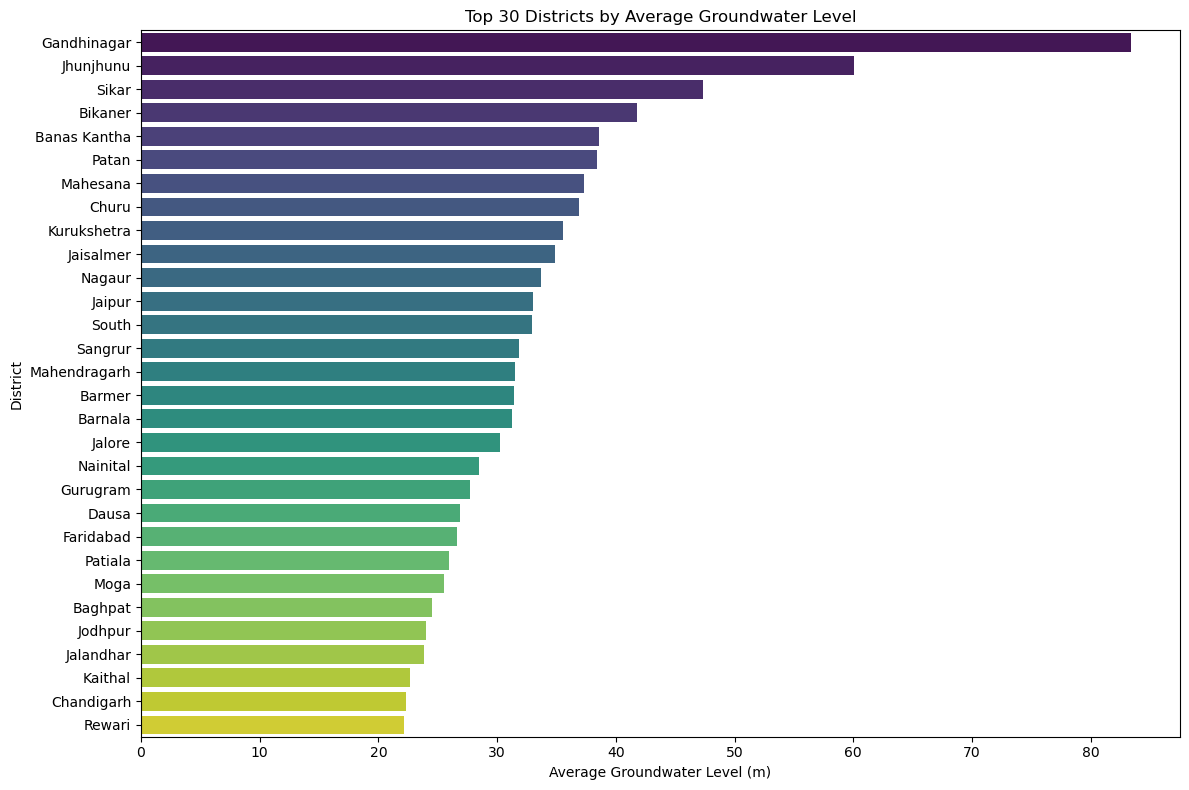

In [10]:
district_avg = df.groupby('district_name')['currentlevel'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=district_avg.head(30), y='district_name', x='currentlevel', palette='viridis')
plt.title('Top 30 Districts by Average Groundwater Level')
plt.xlabel('Average Groundwater Level (m)')
plt.ylabel('District')
plt.tight_layout()
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_36844\2798706979.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_avg.head(32), y='state_name', x='currentlevel', palette='viridis')


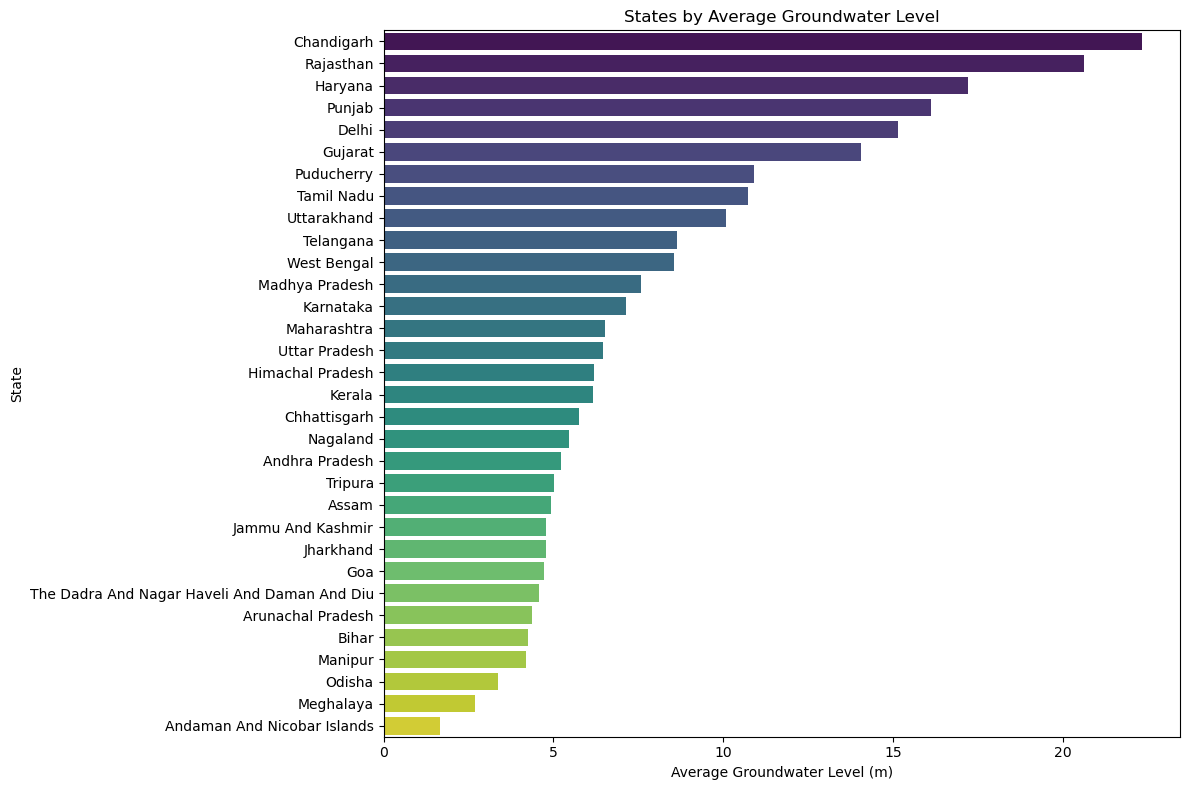

In [11]:
district_avg = df.groupby('state_name')['currentlevel'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=district_avg.head(32), y='state_name', x='currentlevel', palette='viridis')
plt.title('States by Average Groundwater Level')
plt.xlabel('Average Groundwater Level (m)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_36844\2788724021.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_avg, x='season', y='currentlevel', order=['Winter', 'Summer', 'Monsoon', 'Post-Monsoon'], palette='viridis')


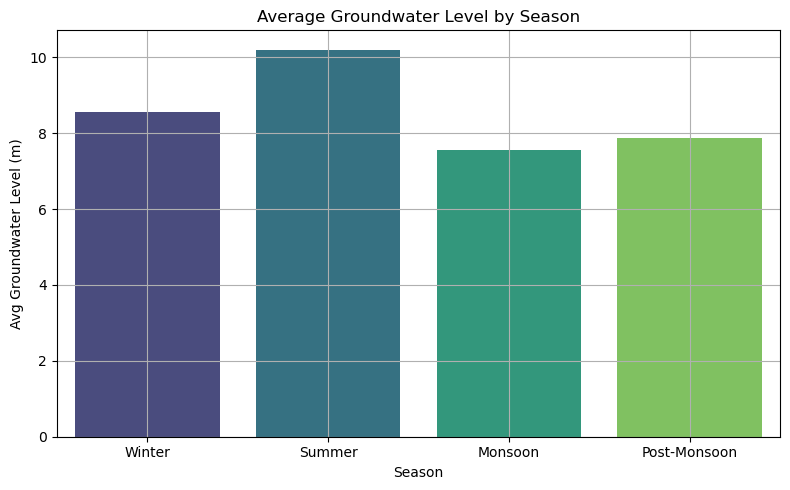

In [12]:
df= df.dropna(subset=['date', 'currentlevel'])
df['month'] = df['date'].dt.month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['season'] = df['month'].apply(get_season)
season_avg = df.groupby('season')['currentlevel'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=season_avg, x='season', y='currentlevel', order=['Winter', 'Summer', 'Monsoon', 'Post-Monsoon'], palette='viridis')
plt.title('Average Groundwater Level by Season')
plt.xlabel('Season')
plt.ylabel('Avg Groundwater Level (m)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
df.columns = df.columns.str.strip().str.lower()
df_sorted = df.sort_values(by='currentlevel')

print("Top 10 Shallowest Water Levels:")
print(df_sorted.head(10)[['district_name', 'state_name', 'station_name', 'currentlevel', 'date']])

print("\n Top 10 Deepest Water Levels:")
print(df_sorted.tail(10)[['district_name', 'state_name', 'station_name', 'currentlevel', 'date']])

Top 10 Shallowest Water Levels:
         district_name      state_name       station_name  currentlevel  \
382405         Dharwad       Karnataka           Kalkurdi           0.0   
502976     Narsimhapur  Madhya Pradesh           Gotegaon           0.0   
508878          Ujjain  Madhya Pradesh      Delchi buzurg           0.0   
475994          Bhopal  Madhya Pradesh            Chichli           0.0   
544748       Ahmedabad         Gujarat          Viramgam2           0.0   
503003     Narsimhapur  Madhya Pradesh         Dangidhana           0.0   
176605        Chittoor  Andhra Pradesh    Karvetinagar-PZ           0.0   
492048          Raisen  Madhya Pradesh  Salamatpurchoraha           0.0   
377524  Chikkamagaluru       Karnataka           Ajjampur           0.0   
475654          Bhopal  Madhya Pradesh       Gandhi Nagar           0.0   

             date  
382405 2018-05-24  
502976 2019-11-14  
508878 2019-08-11  
475994 2019-11-07  
544748 2020-08-24  
503003 2019-11-13  
17

C:\Users\aryan\AppData\Local\Temp\ipykernel_36844\575766168.py:15: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  plt.tight_layout()
c:\Users\aryan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


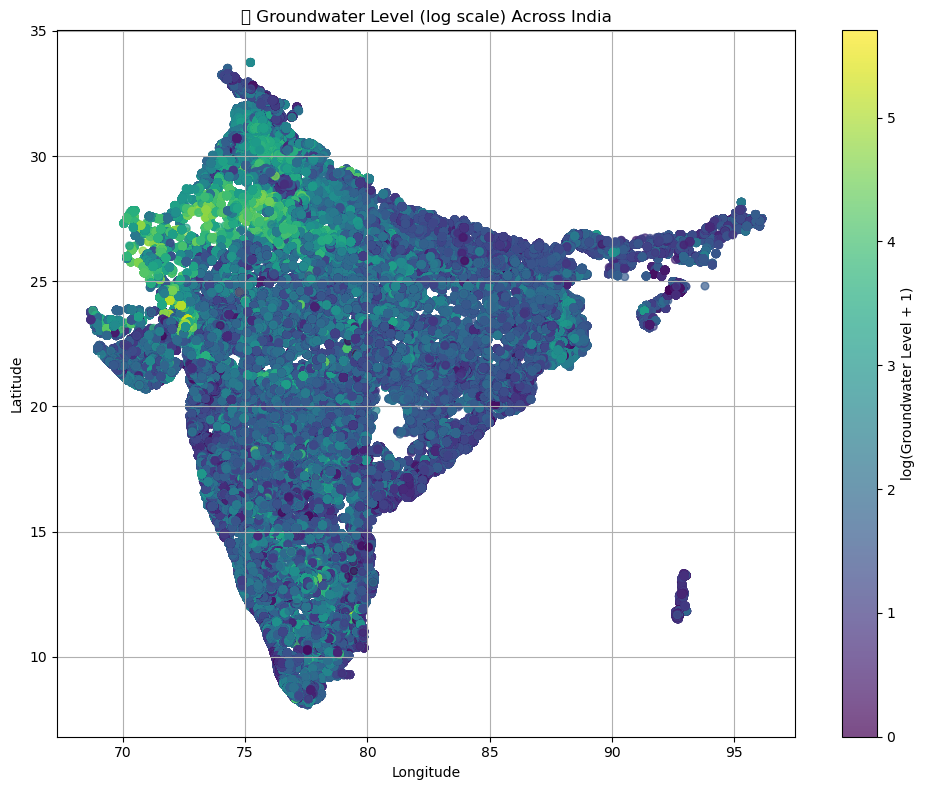

In [15]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df['longitude'],
    df['latitude'],
    c=np.log1p(df['currentlevel']),  # log transform
    cmap='viridis',
    s=30, alpha=0.7
)

plt.colorbar(scatter, label='log(Groundwater Level + 1)')
plt.title('📍 Groundwater Level (log scale) Across India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

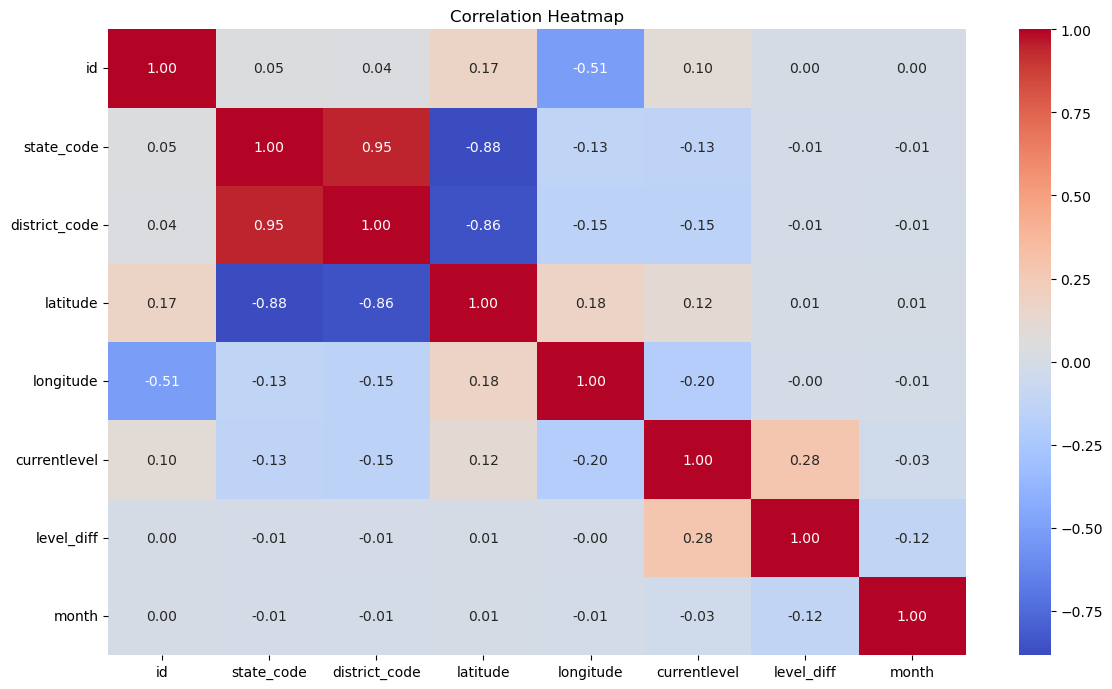

In [16]:
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 7))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

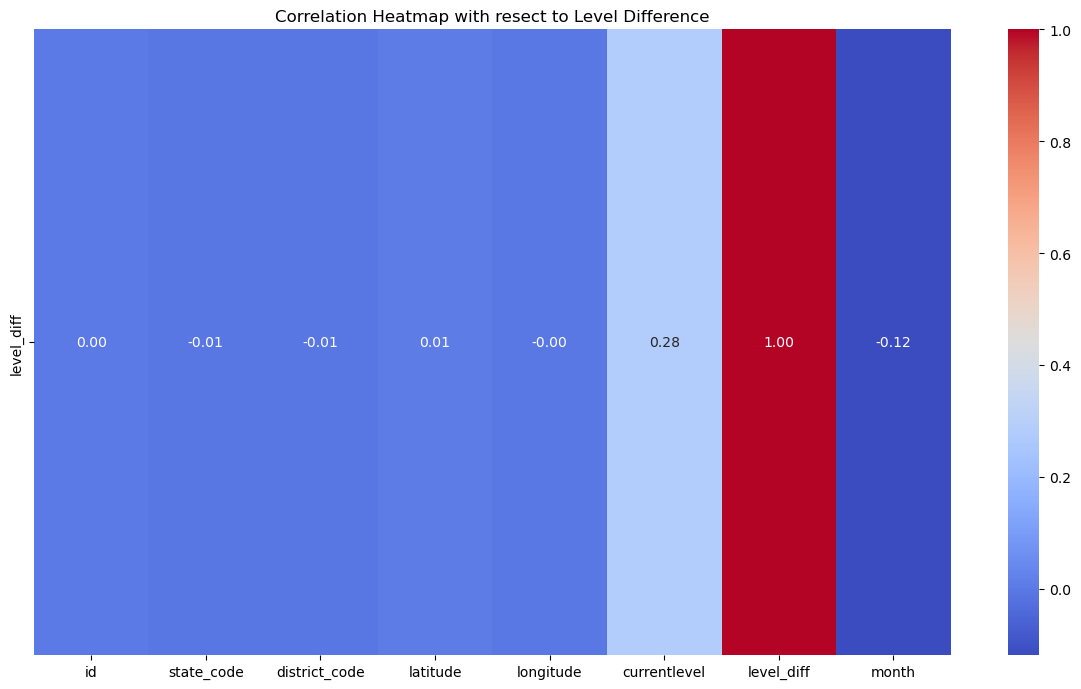

In [17]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_numeric.corr().loc[['level_diff'],:], cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap with resect to Level Difference")
plt.tight_layout()
plt.show()

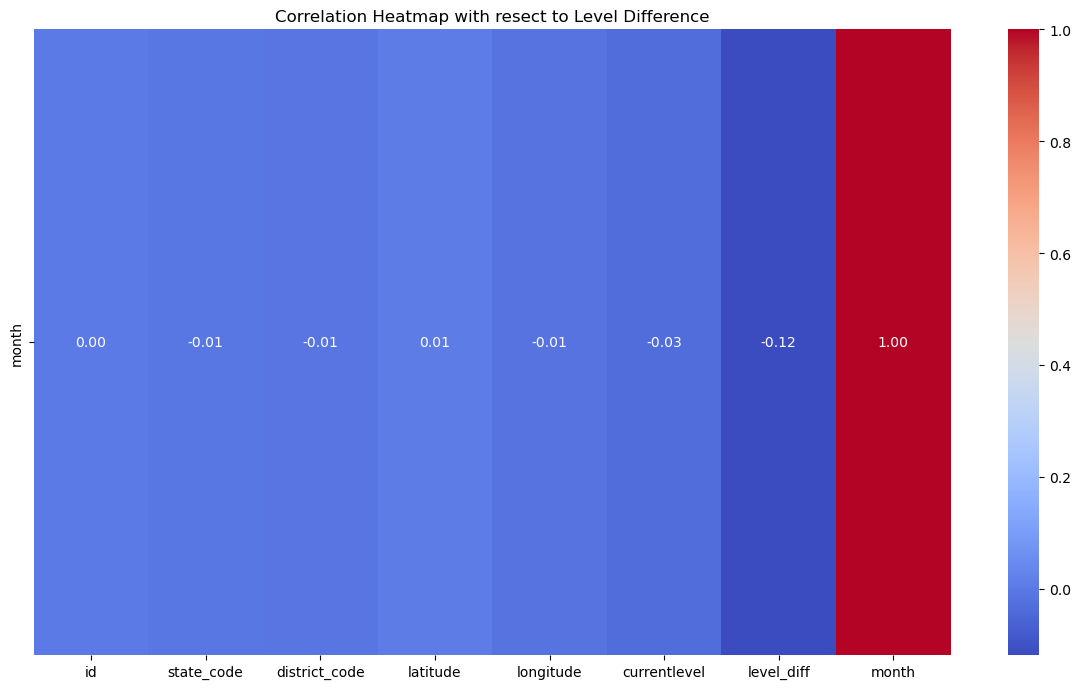

In [18]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_numeric.corr().loc[['month'],:], cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap with resect to Level Difference")
plt.tight_layout()
plt.show()

In [19]:
df['season'] = df['month'].apply(get_season)

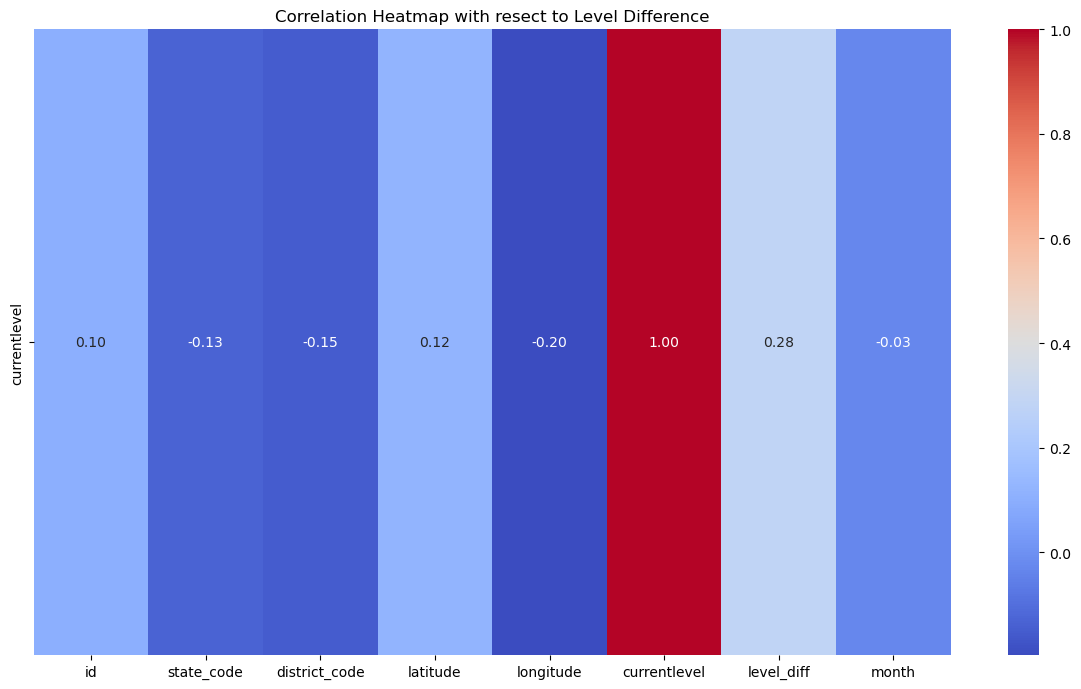

In [20]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_numeric.corr().loc[['currentlevel'],:], cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap with resect to Level Difference")
plt.tight_layout()
plt.show()

In [21]:
# Creating a true copy to edit features
df_copy=df.copy()

In [22]:
df_copy.drop(columns=['district_name','state_name','station_name','date','id','source'],inplace=True)
df_copy.head()

,state_code,district_code,latitude,longitude,basin,sub_basin,currentlevel,level_diff,month,season
0,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,0.10,-1.03,11,Post-Monsoon
1,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,2.60,2.50,5,Summer
2,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,0.35,-2.25,11,Post-Monsoon
3,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,2.52,2.17,5,Summer
4,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,0.69,-1.83,11,Post-Monsoon


In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550850 entries, 0 to 550849
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   state_code     550850 non-null  int64  
 1   district_code  550850 non-null  int64  
 2   latitude       550850 non-null  float64
 3   longitude      550850 non-null  float64
 4   basin          550850 non-null  object 
 5   sub_basin      550850 non-null  object 
 6   currentlevel   550850 non-null  float64
 7   level_diff     550850 non-null  float64
 8   month          550850 non-null  int32  
 9   season         550850 non-null  object 
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 39.9+ MB


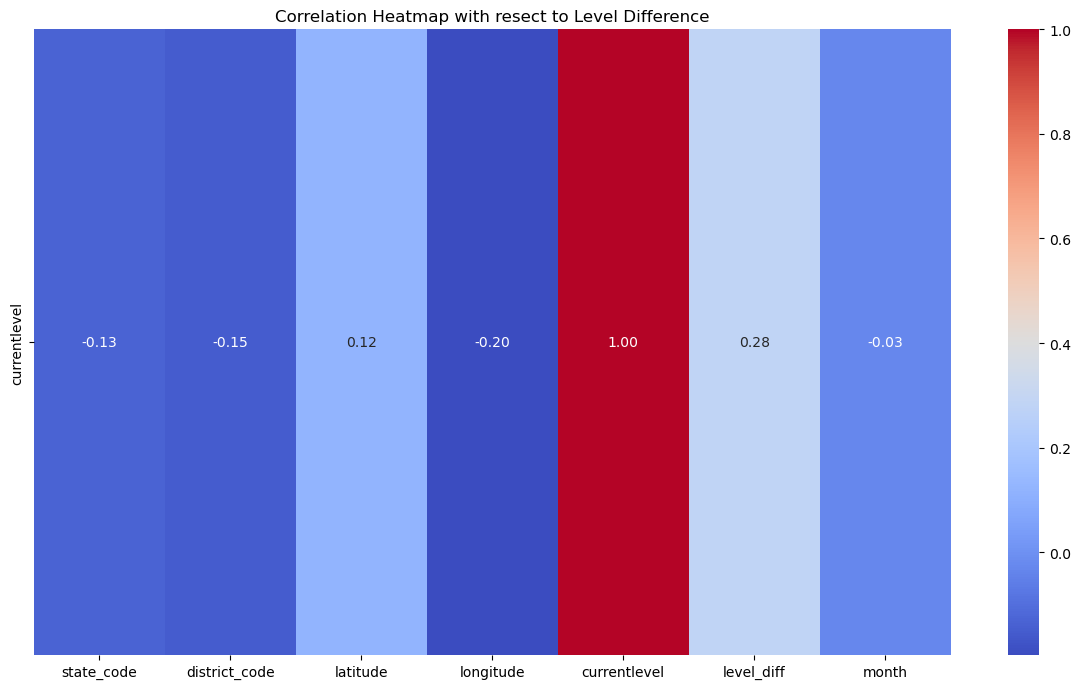

In [24]:
# Making a heat map of the dataframe
df_numeric = df_copy.select_dtypes(exclude='O')
plt.figure(figsize=(12, 7))
sns.heatmap(df_numeric.corr().loc[['currentlevel'],:], cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap with resect to Level Difference")
plt.tight_layout()
plt.show()

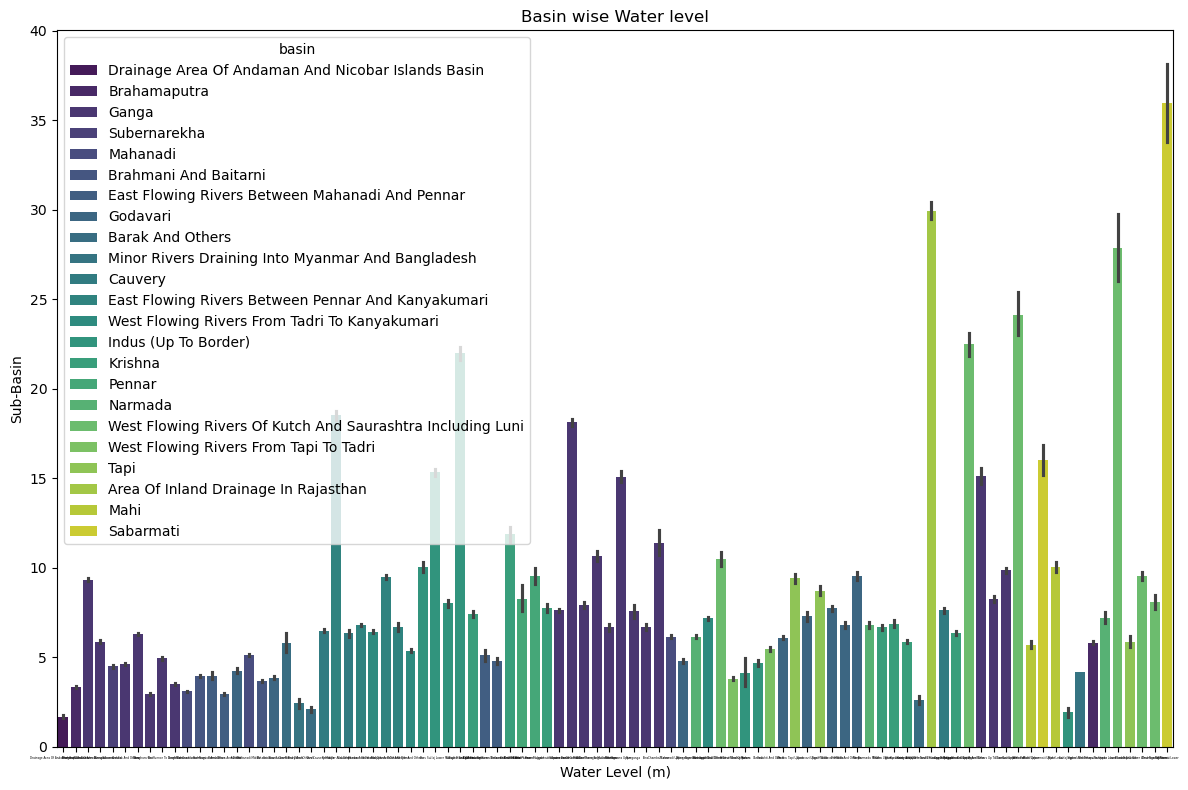

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_copy, x='sub_basin', y='currentlevel', hue='basin', palette='viridis')
plt.title('Basin wise Water level')
plt.xlabel('Water Level (m)')
plt.ylabel('Sub-Basin')
plt.xticks(size=2)
plt.tight_layout()
plt.show()

In [27]:
ohe=OneHotEncoder()
onehotencoded=ohe.fit_transform(df_copy[['season']])
season_columns = ohe.get_feature_names_out(['season'])

In [28]:
df_seasons = pd.DataFrame(onehotencoded.toarray(), columns=season_columns)
df_copy = pd.concat([df_copy, df_seasons], axis=1)
df_copy.head()

,state_code,district_code,latitude,longitude,basin,sub_basin,currentlevel,level_diff,month,season,season_Monsoon,season_Post-Monsoon,season_Summer,season_Winter
0,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,0.10,-1.03,11,Post-Monsoon,0.0,1.0,0.0,0.0
1,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,2.60,2.50,5,Summer,0.0,0.0,1.0,0.0
2,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,0.35,-2.25,11,Post-Monsoon,0.0,1.0,0.0,0.0
3,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,2.52,2.17,5,Summer,0.0,0.0,1.0,0.0
4,35,632,13.28556,93.00306,Drainage Area Of Andaman And Nicobar Islands B...,Drainage Area Of Andaman And Nicobar Islands,0.69,-1.83,11,Post-Monsoon,0.0,1.0,0.0,0.0


In [29]:
df_copy.columns

Index(['state_code', 'district_code', 'latitude', 'longitude', 'basin',
       'sub_basin', 'currentlevel', 'level_diff', 'month', 'season',
       'season_Monsoon', 'season_Post-Monsoon', 'season_Summer',
       'season_Winter'],
      dtype='object')

In [30]:
# Seprating Independent and Dependent Features
x = df_copy[['state_code', 'district_code', 'latitude', 'longitude', 'basin',
       'sub_basin', 'level_diff', 'month', 'season_Monsoon', 'season_Post-Monsoon', 'season_Summer',
       'season_Winter']]     # Independent Feature

y = df_copy['currentlevel']  # Dependent Feature

In [31]:
# Train Test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
x_train.shape,x_test.shape

((440680, 12), (110170, 12))

In [33]:
x_train.to_csv('x_train.csv',index=False)
x_test.to_csv('x_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)